In [179]:
# Importing the necessary libraries 
import pandas as pd
import os 
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

In [180]:
# Loading the Data 
df = pd.read_csv(r'E:\RPC12_Input_For_Participants\Electric Vehicle Analysis Python\datasets\electric_vehicle_sales_by_makers.csv')
df2 = pd.read_csv(r'E:\RPC12_Input_For_Participants\Electric Vehicle Analysis Python\datasets\electric_vehicle_sales_by_state.csv')

##### Analyzing the Data

In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   date                    816 non-null    object
 1   vehicle_category        816 non-null    object
 2   maker                   816 non-null    object
 3   electric_vehicles_sold  816 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 25.6+ KB


In [182]:
df.describe()

,electric_vehicles_sold
count,816.000000
mean,2531.998775
std,4771.077333
min,0.000000
25%,42.000000
50%,662.000000
75%,2636.500000
max,44630.000000


In [183]:
df.columns

Index(['date', 'vehicle_category', 'maker', 'electric_vehicles_sold'], dtype='object')

In [184]:
df

,date,vehicle_category,maker,electric_vehicles_sold
0,01-Apr-21,2-Wheelers,OLA ELECTRIC,0
1,01-Apr-22,2-Wheelers,OKAYA EV,0
2,01-May-21,2-Wheelers,OLA ELECTRIC,0
3,01-Jun-21,2-Wheelers,OLA ELECTRIC,0
4,01-Jul-21,2-Wheelers,OLA ELECTRIC,0
...,...,...,...,...
811,01-Mar-24,2-Wheelers,BGAUSS,3070
812,01-Mar-24,2-Wheelers,BATTRE ELECTRIC,625
813,01-Mar-24,2-Wheelers,KINETIC GREEN,3915
814,01-Mar-24,2-Wheelers,REVOLT,585


In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   date                    816 non-null    object
 1   vehicle_category        816 non-null    object
 2   maker                   816 non-null    object
 3   electric_vehicles_sold  816 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 25.6+ KB


In [186]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2445 entries, 0 to 2444
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   date                    2445 non-null   object
 1   state                   2445 non-null   object
 2   vehicle_category        2445 non-null   object
 3   electric_vehicles_sold  2445 non-null   int64 
 4   total_vehicles_sold     2445 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 95.6+ KB


In [187]:
df2.describe()

,electric_vehicles_sold,total_vehicles_sold
count,2445.000000,2445.000000
mean,845.035174,23402.966053
std,2185.167744,38353.266389
min,0.000000,1.000000
25%,2.000000,1158.000000
50%,54.000000,6098.000000
75%,534.000000,29396.000000
max,26668.000000,387983.000000


In [188]:
df2.columns

Index(['date', 'state', 'vehicle_category', 'electric_vehicles_sold',
       'total_vehicles_sold'],
      dtype='object')

##### Cleaning the Data

In [189]:
df['date'] = pd.to_datetime(df['date'], format='mixed')

In [190]:
df

,date,vehicle_category,maker,electric_vehicles_sold
0,2021-04-01,2-Wheelers,OLA ELECTRIC,0
1,2022-04-01,2-Wheelers,OKAYA EV,0
2,2021-05-01,2-Wheelers,OLA ELECTRIC,0
3,2021-06-01,2-Wheelers,OLA ELECTRIC,0
4,2021-07-01,2-Wheelers,OLA ELECTRIC,0
...,...,...,...,...
811,2024-03-01,2-Wheelers,BGAUSS,3070
812,2024-03-01,2-Wheelers,BATTRE ELECTRIC,625
813,2024-03-01,2-Wheelers,KINETIC GREEN,3915
814,2024-03-01,2-Wheelers,REVOLT,585


In [191]:
df2['date'] = pd.to_datetime(df2['date'], format='mixed')

In [192]:
df2

,date,state,vehicle_category,electric_vehicles_sold,total_vehicles_sold
0,2021-04-01,Sikkim,2-Wheelers,0,398
1,2021-04-01,Sikkim,4-Wheelers,0,361
2,2021-05-01,Sikkim,2-Wheelers,0,113
3,2021-05-01,Sikkim,4-Wheelers,0,98
4,2021-06-01,Sikkim,2-Wheelers,0,229
...,...,...,...,...,...
2440,2024-03-01,Mizoram,2-Wheelers,58,1932
2441,2024-03-01,DNH and DD,2-Wheelers,25,780
2442,2024-03-01,Manipur,2-Wheelers,13,1394
2443,2024-03-01,Andaman & Nicobar Island,2-Wheelers,2,447


#### Preliminary Research Questions:

Question No : 01 - List the top 3 and bottom 3 makers for the fiscal years 2023 and 2024 in terms of the number of 2-wheelers sold.

In [193]:
def get_fiscal_year(date):
    fiscal_year_start_month = 4  
    fiscal_year_start_day = 1
    year = date.year
    month = date.month
    day = date.day
    
    if month < fiscal_year_start_month or (month == fiscal_year_start_month and day < fiscal_year_start_day):
        fiscal_year = year - 1
    else:
        fiscal_year = year

    return f"FY{fiscal_year+1}"


df['fiscal_year'] = df['date'].apply(get_fiscal_year)



In [194]:
df

,date,vehicle_category,maker,electric_vehicles_sold,fiscal_year
0,2021-04-01,2-Wheelers,OLA ELECTRIC,0,FY2022
1,2022-04-01,2-Wheelers,OKAYA EV,0,FY2023
2,2021-05-01,2-Wheelers,OLA ELECTRIC,0,FY2022
3,2021-06-01,2-Wheelers,OLA ELECTRIC,0,FY2022
4,2021-07-01,2-Wheelers,OLA ELECTRIC,0,FY2022
...,...,...,...,...,...
811,2024-03-01,2-Wheelers,BGAUSS,3070,FY2024
812,2024-03-01,2-Wheelers,BATTRE ELECTRIC,625,FY2024
813,2024-03-01,2-Wheelers,KINETIC GREEN,3915,FY2024
814,2024-03-01,2-Wheelers,REVOLT,585,FY2024


In [195]:
df_2_wheelers = df[df['vehicle_category'] == '2-Wheelers']
df_filtered = df_2_wheelers[df_2_wheelers['fiscal_year'].isin(['FY2023', 'FY2024'])]
df_4_wheelers = df[df['vehicle_category'] == '4-Wheelers']

In [196]:
df_filtered

,date,vehicle_category,maker,electric_vehicles_sold,fiscal_year
1,2022-04-01,2-Wheelers,OKAYA EV,0,FY2023
380,2022-04-01,2-Wheelers,OLA ELECTRIC,13601,FY2023
381,2022-04-01,2-Wheelers,OKINAWA,11341,FY2023
382,2022-04-01,2-Wheelers,HERO ELECTRIC,6803,FY2023
383,2022-04-01,2-Wheelers,AMPERE,6864,FY2023
...,...,...,...,...,...
811,2024-03-01,2-Wheelers,BGAUSS,3070,FY2024
812,2024-03-01,2-Wheelers,BATTRE ELECTRIC,625,FY2024
813,2024-03-01,2-Wheelers,KINETIC GREEN,3915,FY2024
814,2024-03-01,2-Wheelers,REVOLT,585,FY2024


In [197]:
final_results = df_filtered.groupby(['fiscal_year', 'maker'])[['electric_vehicles_sold']].sum().reset_index()


In [198]:
def get_top_bottom(df, fiscal_year):
    df_year = df[df['fiscal_year'] == fiscal_year]
    df_sorted = df_year.sort_values(by='electric_vehicles_sold', ascending=False)
    top_3 = df_sorted.head(3)
    bottom_3 = df_sorted.tail(3)
    return top_3, bottom_3


In [199]:
top_3_FY2023, bottom_3_FY2023 = get_top_bottom(final_results, 'FY2023')
top_3_FY2024, bottom_3_FY2024 = get_top_bottom(final_results, 'FY2024')

In [200]:
print("Fiscal Year 2023 - Top 3 Makers:")
top_3_FY2023


Fiscal Year 2023 - Top 3 Makers:


,fiscal_year,maker,electric_vehicles_sold
8,FY2023,OLA ELECTRIC,152583
7,FY2023,OKINAWA,96945
4,FY2023,HERO ELECTRIC,88993


In [201]:
print("Fiscal Year 2023 - Bottom 3 Makers:")
bottom_3_FY2023


Fiscal Year 2023 - Bottom 3 Makers:


,fiscal_year,maker,electric_vehicles_sold
10,FY2023,PURE EV,11556
3,FY2023,BEING,11018
5,FY2023,JITENDRA,8563


In [202]:

print("Fiscal Year 2024 - Top 3 Makers:")
top_3_FY2024


Fiscal Year 2024 - Top 3 Makers:


,fiscal_year,maker,electric_vehicles_sold
22,FY2024,OLA ELECTRIC,322489
25,FY2024,TVS,180743
14,FY2024,ATHER,107552


In [203]:
print("Fiscal Year 2024 - Bottom 3 Makers:")
bottom_3_FY2024

Fiscal Year 2024 - Bottom 3 Makers:


,fiscal_year,maker,electric_vehicles_sold
19,FY2024,KINETIC GREEN,9585
24,FY2024,REVOLT,7254
16,FY2024,BATTRE ELECTRIC,4841


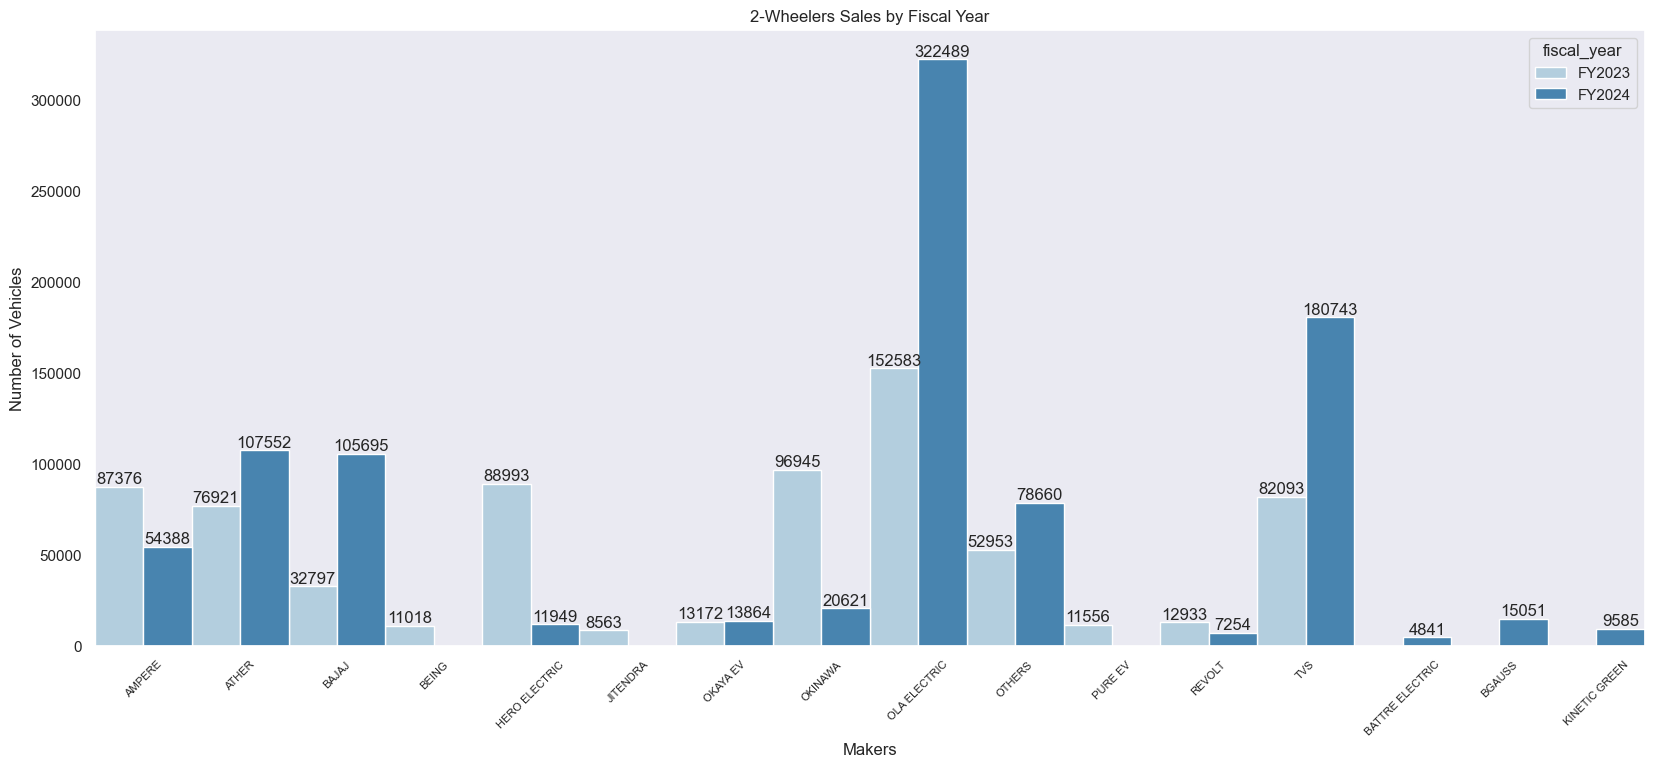

In [204]:
plt.figure(figsize=(20, 8))
ax = sns.barplot(data = final_results, x = 'maker', y ='electric_vehicles_sold',hue='fiscal_year',palette='Blues',width=1)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('2-Wheelers Sales by Fiscal Year')
plt.xticks(rotation= 45,size=8)
plt.ylabel('Number of Vehicles')
plt.xlabel('Makers')
plt.show()

Question No : 02 - Identify the top 5 states with the highest penetration rate in 2-wheeler and 4-wheeler EV sales in FY 2024.

In [205]:
df2['fiscal_year'] = df2['date'].apply(get_fiscal_year)

In [206]:
df2

,date,state,vehicle_category,electric_vehicles_sold,total_vehicles_sold,fiscal_year
0,2021-04-01,Sikkim,2-Wheelers,0,398,FY2022
1,2021-04-01,Sikkim,4-Wheelers,0,361,FY2022
2,2021-05-01,Sikkim,2-Wheelers,0,113,FY2022
3,2021-05-01,Sikkim,4-Wheelers,0,98,FY2022
4,2021-06-01,Sikkim,2-Wheelers,0,229,FY2022
...,...,...,...,...,...,...
2440,2024-03-01,Mizoram,2-Wheelers,58,1932,FY2024
2441,2024-03-01,DNH and DD,2-Wheelers,25,780,FY2024
2442,2024-03-01,Manipur,2-Wheelers,13,1394,FY2024
2443,2024-03-01,Andaman & Nicobar Island,2-Wheelers,2,447,FY2024


In [207]:
df2['vehicle_category'].unique()

array(['2-Wheelers', '4-Wheelers'], dtype=object)

In [208]:
df2_FY2024 = df2[df2['fiscal_year']== 'FY2024']
df2_FY2023 = df2[df2['fiscal_year']== 'FY2023']
df2_FY2022 = df2[df2['fiscal_year']== 'FY2022']

In [209]:
df2_FY2024

,date,state,vehicle_category,electric_vehicles_sold,total_vehicles_sold,fiscal_year
48,2023-04-01,Sikkim,2-Wheelers,0,465,FY2024
49,2023-04-01,Sikkim,4-Wheelers,0,439,FY2024
50,2023-05-01,Sikkim,2-Wheelers,0,507,FY2024
51,2023-05-01,Sikkim,4-Wheelers,0,448,FY2024
52,2023-06-01,Sikkim,2-Wheelers,0,517,FY2024
...,...,...,...,...,...,...
2440,2024-03-01,Mizoram,2-Wheelers,58,1932,FY2024
2441,2024-03-01,DNH and DD,2-Wheelers,25,780,FY2024
2442,2024-03-01,Manipur,2-Wheelers,13,1394,FY2024
2443,2024-03-01,Andaman & Nicobar Island,2-Wheelers,2,447,FY2024


In [210]:
df2_2wheelers_FY2024 = df2_FY2024[df2_FY2024['vehicle_category']== '2-Wheelers']
df2_4wheelers_FY2024 = df2_FY2024[df2_FY2024['vehicle_category']== '4-Wheelers']

In [211]:
def calculate_penetration_rate (df2, category): 
    total_vehicle_sold = df2.groupby('state')['total_vehicles_sold'].sum()
    electric_vehicle_sold = df2.groupby('state')['electric_vehicles_sold'].sum()
    penetration_rate = ((electric_vehicle_sold/total_vehicle_sold)*100).reset_index()
    penetration_rate.columns = ['state', f'{category}_penetration_rate_%']   
    return penetration_rate


In [212]:
penetration_rate_2wheelers = calculate_penetration_rate(df2_2wheelers_FY2024,'2-Wheelers' )
penetration_rate_4wheelers = calculate_penetration_rate(df2_4wheelers_FY2024,'4-Wheelers' )

In [213]:
top5_States_Penetration_Rate_2wheelers = penetration_rate_2wheelers.sort_values(by='2-Wheelers_penetration_rate_%',ascending=False).head(5)
top5_States_Penetration_Rate_4wheelers = penetration_rate_4wheelers.sort_values(by='4-Wheelers_penetration_rate_%',ascending=False).head(5)

In [214]:
print("Top 5 states with highest penetration rate in 2-wheeler EV sales in FY 2024")
top5_States_Penetration_Rate_2wheelers

Top 5 states with highest penetration rate in 2-wheeler EV sales in FY 2024


,state,2-Wheelers_penetration_rate_%
10,Goa,17.992264
17,Kerala,13.524903
16,Karnataka,11.573279
20,Maharashtra,10.072507
9,Delhi,9.400866


In [215]:
print("Top 5 states with highest penetration rate in 4-wheeler EV sales in FY 2024")
top5_States_Penetration_Rate_4wheelers

Top 5 states with highest penetration rate in 4-wheeler EV sales in FY 2024


,state,4-Wheelers_penetration_rate_%
17,Kerala,5.758445
6,Chandigarh,4.503112
9,Delhi,4.290757
16,Karnataka,4.261120
10,Goa,4.254353


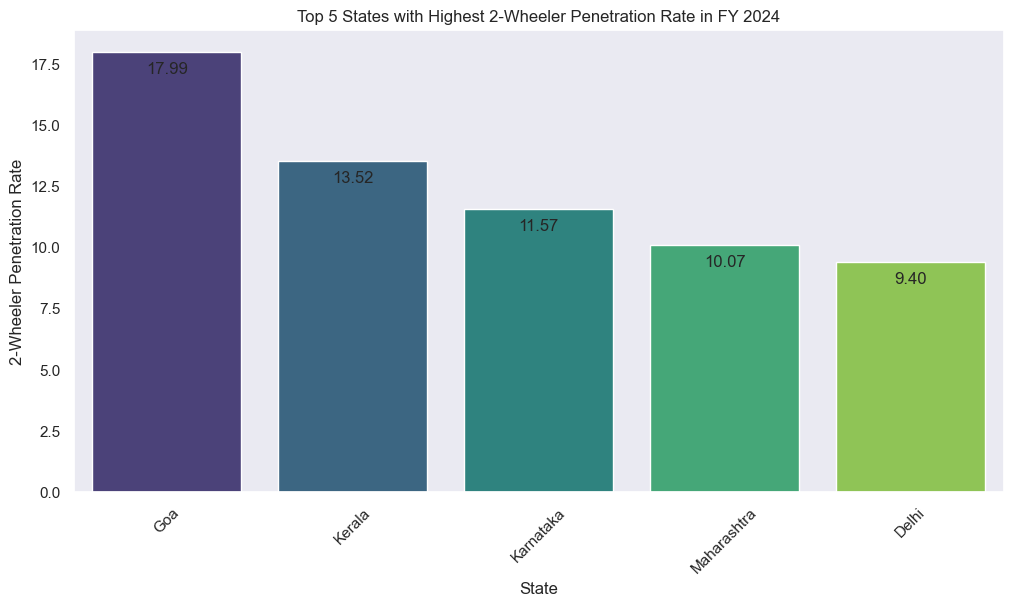

In [216]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(data = top5_States_Penetration_Rate_2wheelers, x = 'state', y ='2-Wheelers_penetration_rate_%', hue= 'state', palette='viridis')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, -12), 
                textcoords = 'offset points')
plt.title('Top 5 States with Highest 2-Wheeler Penetration Rate in FY 2024')
plt.ylabel('2-Wheeler Penetration Rate')
plt.xlabel('State')
plt.xticks(rotation=45)
plt.show()

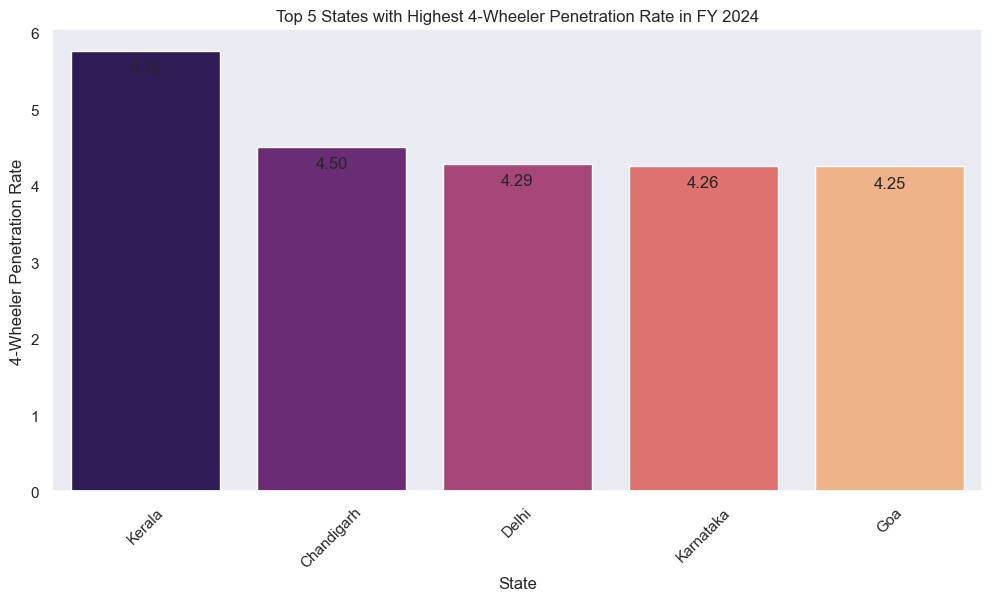

In [217]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(data = top5_States_Penetration_Rate_4wheelers, x = 'state', y ='4-Wheelers_penetration_rate_%', hue= 'state', palette='magma')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, -12), 
                textcoords = 'offset points')
plt.title('Top 5 States with Highest 4-Wheeler Penetration Rate in FY 2024')
plt.ylabel('4-Wheeler Penetration Rate')
plt.xlabel('State')
plt.xticks(rotation=45)
plt.show()

Question No : 03 - List the states with negative penetration (decline) in EV sales from 2022 to 2024?

In [218]:
df2.columns

Index(['date', 'state', 'vehicle_category', 'electric_vehicles_sold',
       'total_vehicles_sold', 'fiscal_year'],
      dtype='object')

In [219]:
def calculate_penetration_rate_all(df2):
    total_vehicle_sold = df2.groupby(['state','fiscal_year'])['total_vehicles_sold'].sum()
    electric_vehicle_sold = df2.groupby(['state','fiscal_year'])['electric_vehicles_sold'].sum()
    penetration_rate = ((electric_vehicle_sold/total_vehicle_sold)*100).reset_index()
    penetration_rate.columns = ['state','fiscal_year','%_penetration_rate']
    return penetration_rate



In [220]:
penetration_rate_FY2022 = calculate_penetration_rate_all(df2_FY2022)
penetration_rate_FY2022['%_penetration_rate'] = penetration_rate_FY2022['%_penetration_rate'].round(2)
penetration_rate_FY2024 = calculate_penetration_rate_all(df2_FY2024)
penetration_rate_FY2024['%_penetration_rate'] = penetration_rate_FY2024['%_penetration_rate'].round(2)
merged_penetration_rate =pd.merge(penetration_rate_FY2022, penetration_rate_FY2024,on='state', suffixes=['FY2022','FY2024'])


In [221]:
penetration_rate_FY2022.columns

Index(['state', 'fiscal_year', '%_penetration_rate'], dtype='object')

In [222]:
merged_penetration_rate

,state,fiscal_yearFY2022,%_penetration_rateFY2022,fiscal_yearFY2024,%_penetration_rateFY2024
0,Andaman & Nicobar Island,FY2022,0.43,FY2024,0.50
1,Andhra Pradesh,FY2022,1.80,FY2024,4.24
2,Arunachal Pradesh,FY2022,0.00,FY2024,0.11
3,Assam,FY2022,0.19,FY2024,0.64
4,Bihar,FY2022,0.54,FY2024,1.33
5,Chandigarh,FY2022,1.11,FY2024,6.37
6,Chhattisgarh,FY2022,1.16,FY2024,5.67
7,DNH and DD,FY2022,0.28,FY2024,1.21
8,Delhi,FY2022,4.12,FY2024,7.71
9,Goa,FY2022,3.68,FY2024,13.75


In [223]:
penetration_rate_FY2022.sort_values('%_penetration_rate').head(5)

,state,fiscal_year,%_penetration_rate
2,Arunachal Pradesh,FY2022,0.00
28,Sikkim,FY2022,0.00
22,Mizoram,FY2022,0.00
23,Nagaland,FY2022,0.01
21,Meghalaya,FY2022,0.02


In [224]:
penetration_rate_FY2024.sort_values('%_penetration_rate').head(5)

,state,fiscal_year,%_penetration_rate
29,Sikkim,FY2024,0.00
24,Nagaland,FY2024,0.05
3,Arunachal Pradesh,FY2024,0.11
0,Andaman & Nicobar,FY2024,0.30
22,Meghalaya,FY2024,0.36


In [225]:
declining_states = merged_penetration_rate[merged_penetration_rate['%_penetration_rateFY2024'] < merged_penetration_rate['%_penetration_rateFY2022']]
declining_states

,state,fiscal_yearFY2022,%_penetration_rateFY2022,fiscal_yearFY2024,%_penetration_rateFY2024


In [226]:
if declining_states.empty:
    print("No states experienced a decline in EV penetration rate from FY 2022 to FY 2024.")
else:
    print("States with a decline in EV penetration rate from FY 2022 to FY 2024:")
    print(declining_states[['state', 'penetration_rate_FY2022', 'penetration_rate_FY2024']])

No states experienced a decline in EV penetration rate from FY 2022 to FY 2024.


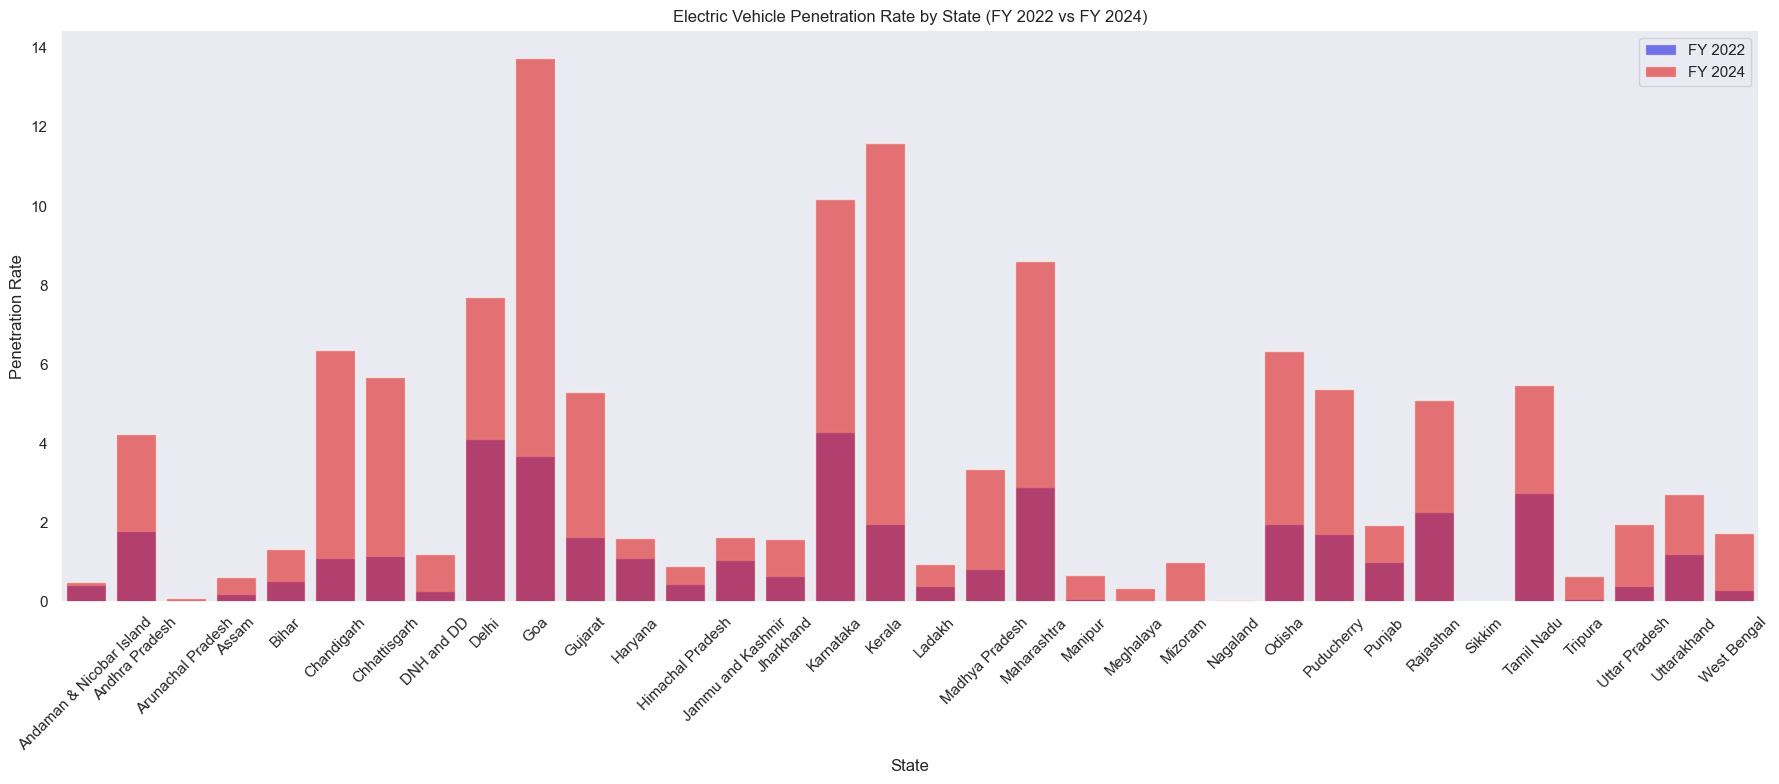

In [227]:
sns.set_theme(style="dark")


plt.figure(figsize=(18, 8))


sns.barplot(x='state', y='%_penetration_rateFY2022', data=merged_penetration_rate, color='blue', alpha=0.6, label='FY 2022')


sns.barplot(x='state', y='%_penetration_rateFY2024', data=merged_penetration_rate, color='red', alpha=0.6, label='FY 2024')


plt.xlabel('State')
plt.ylabel('Penetration Rate')
plt.title('Electric Vehicle Penetration Rate by State (FY 2022 vs FY 2024)')
plt.xticks(rotation=45)
plt.legend()


plt.tight_layout()
plt.show()

Question No : 04 - What are the quarterly trends based on sales volume for the top 5 EV makers (4-wheelers) from 2022 to 2024?

In [228]:
def get_custom_quarter(date):
    month = date.month
    if month in [1, 2, 3]:
        return 'Q4'  # Q4
    elif month in [4, 5, 6]:
        return 'Q1'  # Q1
    elif month in [7, 8, 9]:
        return 'Q2'  # Q2
    elif month in [10, 11, 12]:
        return 'Q3'  # Q3


df_4_wheelers.loc[:, 'quarter'] = df_4_wheelers['date'].apply(get_custom_quarter)

df_4_wheelers

C:\Users\samit\AppData\Local\Temp\ipykernel_31244\3130091389.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_4_wheelers.loc[:, 'quarter'] = df_4_wheelers['date'].apply(get_custom_quarter)


,date,vehicle_category,maker,electric_vehicles_sold,fiscal_year,quarter
9,2021-04-01,4-Wheelers,BYD India,0,FY2022,Q1
10,2021-04-01,4-Wheelers,PCA Automobiles,0,FY2022,Q1
11,2021-04-01,4-Wheelers,BMW India,0,FY2022,Q1
12,2021-04-01,4-Wheelers,Volvo Auto India,0,FY2022,Q1
13,2021-04-01,4-Wheelers,KIA Motors,0,FY2022,Q1
...,...,...,...,...,...,...
364,2024-03-01,4-Wheelers,PCA Automobiles,130,FY2024,Q4
365,2024-03-01,4-Wheelers,BMW India,55,FY2024,Q4
366,2024-03-01,4-Wheelers,Mercedes -Benz AG,31,FY2024,Q4
367,2024-03-01,4-Wheelers,Volvo Auto India,39,FY2024,Q4


In [229]:
df_trends = df_4_wheelers.sort_values(['quarter','fiscal_year'])
df_trends

,date,vehicle_category,maker,electric_vehicles_sold,fiscal_year,quarter
9,2021-04-01,4-Wheelers,BYD India,0,FY2022,Q1
10,2021-04-01,4-Wheelers,PCA Automobiles,0,FY2022,Q1
11,2021-04-01,4-Wheelers,BMW India,0,FY2022,Q1
12,2021-04-01,4-Wheelers,Volvo Auto India,0,FY2022,Q1
13,2021-04-01,4-Wheelers,KIA Motors,0,FY2022,Q1
...,...,...,...,...,...,...
364,2024-03-01,4-Wheelers,PCA Automobiles,130,FY2024,Q4
365,2024-03-01,4-Wheelers,BMW India,55,FY2024,Q4
366,2024-03-01,4-Wheelers,Mercedes -Benz AG,31,FY2024,Q4
367,2024-03-01,4-Wheelers,Volvo Auto India,39,FY2024,Q4


In [230]:
df_trends_sales_quarterly = df_trends.groupby(['maker','fiscal_year','quarter'])['electric_vehicles_sold'].sum().reset_index()

In [231]:
df_trends_sales_quarterly 

,maker,fiscal_year,quarter,electric_vehicles_sold
0,BMW India,FY2022,Q1,0
1,BMW India,FY2022,Q2,0
2,BMW India,FY2022,Q3,0
3,BMW India,FY2022,Q4,7
4,BMW India,FY2023,Q1,22
...,...,...,...,...
115,Volvo Auto India,FY2023,Q4,84
116,Volvo Auto India,FY2024,Q1,94
117,Volvo Auto India,FY2024,Q2,104
118,Volvo Auto India,FY2024,Q3,145


In [232]:
total_sales = df_trends_sales_quarterly.groupby('maker')['electric_vehicles_sold'].sum().reset_index()
top_5_makers = total_sales.sort_values(by='electric_vehicles_sold',ascending=False).head(5)['maker']

In [233]:
top_5_sales

,maker,fiscal_year,quarter,electric_vehicles_sold,year
12,BYD India,FY2022,Q1,0,2022
13,BYD India,FY2022,Q2,0,2022
14,BYD India,FY2022,Q3,1,2022
15,BYD India,FY2022,Q4,32,2022
16,BYD India,FY2023,Q1,81,2023
17,BYD India,FY2023,Q2,113,2023
18,BYD India,FY2023,Q3,103,2023
19,BYD India,FY2023,Q4,623,2023
20,BYD India,FY2024,Q1,406,2024
21,BYD India,FY2024,Q2,310,2024


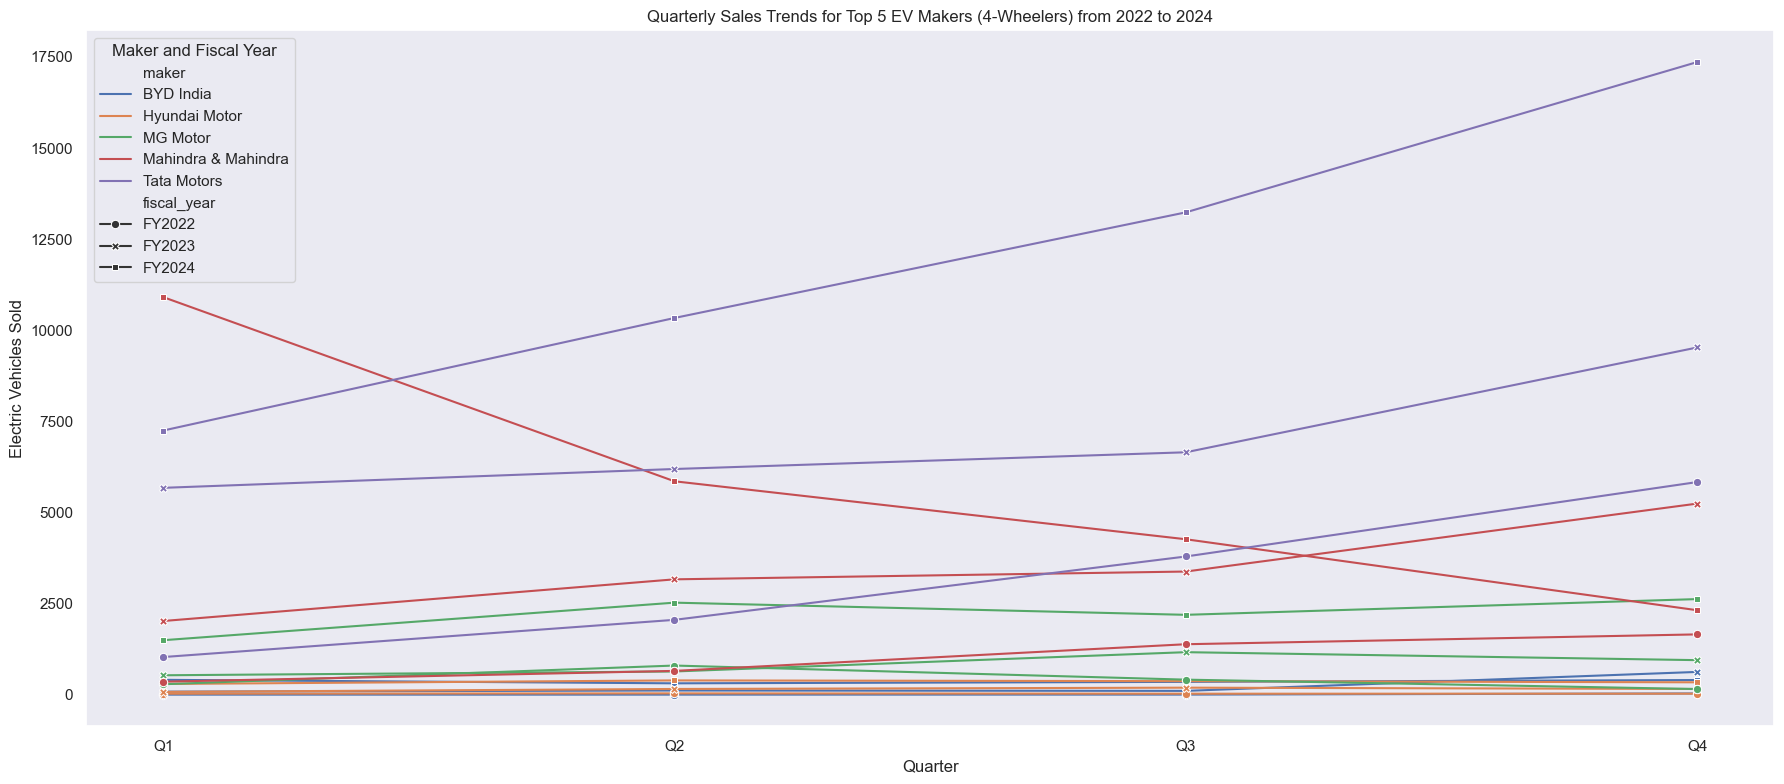

In [234]:
top_5_sales = df_trends_sales_quarterly[df_trends_sales_quarterly['maker'].isin(top_5_makers)]

# Plotting quarterly trends
plt.figure(figsize=(18, 8))
sns.lineplot(data=top_5_sales, x='quarter', y='electric_vehicles_sold', hue='maker', style='fiscal_year', markers=True, dashes=False)
plt.title('Quarterly Sales Trends for Top 5 EV Makers (4-Wheelers) from 2022 to 2024')
plt.xlabel('Quarter')
plt.ylabel('Electric Vehicles Sold')
plt.legend(title='Maker and Fiscal Year')
plt.tight_layout()
plt.show()

Question No : 05 - How do the EV sales and penetration rates in Delhi compare to Karnataka for 2024?

In [235]:
penetration_rate_FY2024_Delhi= penetration_rate_FY2024[penetration_rate_FY2024['state']== 'Delhi'] 
penetration_rate_FY2024_Karnataka= penetration_rate_FY2024[penetration_rate_FY2024['state']== 'Karnataka']

In [236]:
df2_FY2024 = df2[df2['fiscal_year']=='FY2024']

EV_Sales = df2_FY2024.groupby('state')['electric_vehicles_sold'].sum().reset_index()

In [237]:
EV_Sales_Delhi = EV_Sales[EV_Sales['state']=='Delhi'] 
EV_Sales_Karnataka = EV_Sales[EV_Sales['state']=='Karnataka'] 

In [238]:
print("Penetration Rate for Delhi in FY2024:")
penetration_rate_FY2024_Delhi

Penetration Rate for Delhi in FY2024:


,state,fiscal_year,%_penetration_rate
9,Delhi,FY2024,7.71


In [239]:
print("\nPenetration Rate for Karnataka in FY2024:")
penetration_rate_FY2024_Karnataka


Penetration Rate for Karnataka in FY2024:


,state,fiscal_year,%_penetration_rate
16,Karnataka,FY2024,10.18


In [240]:
print("\nEV Sales for Delhi in FY2024:")
EV_Sales_Delhi 


EV Sales for Delhi in FY2024:


,state,electric_vehicles_sold
9,Delhi,46724


In [286]:
print("\nEV Sales for Karnataka in FY2024:")
EV_Sales_Karnataka


EV Sales for Karnataka in FY2024:


,state,electric_vehicles_sold
16,Karnataka,160989


In [243]:
penetration_data = pd.DataFrame({
    'state': ['Delhi', 'Karnataka'],
    'penetration_rate': [penetration_rate_FY2024_Delhi['%_penetration_rate'].values[0], penetration_rate_FY2024_Karnataka['%_penetration_rate'].values[0]]
})


combined_data = EV_Sales.merge(penetration_data, on='state')


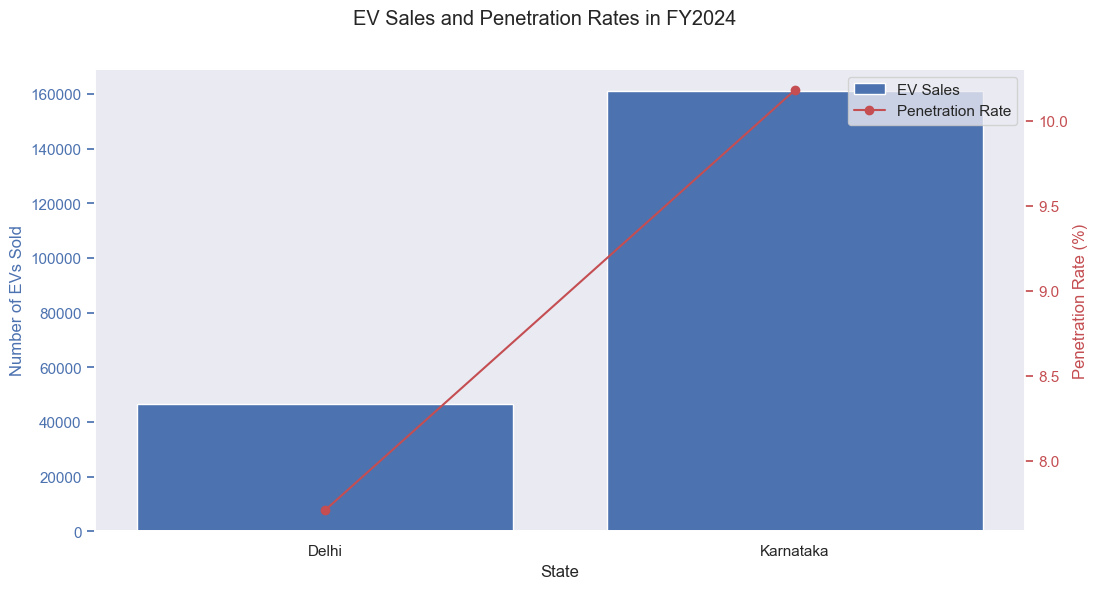

In [244]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar chart for EV sales
ax1.bar(combined_data['state'], combined_data['electric_vehicles_sold'], color='b', label='EV Sales')
ax1.set_xlabel('State')
ax1.set_ylabel('Number of EVs Sold', color='b')
ax1.tick_params('y', colors='b')

# Line chart for penetration rates
ax2 = ax1.twinx()
ax2.plot(combined_data['state'], combined_data['penetration_rate'], color='r', label='Penetration Rate', marker='o')
ax2.set_ylabel('Penetration Rate (%)', color='r')
ax2.tick_params('y', colors='r')

fig.suptitle('EV Sales and Penetration Rates in FY2024')
fig.legend(loc='upper right', bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)
plt.show()

Question No : 06 - List down the compounded annual growth rate (CAGR) in 4-wheeler units for the top 5 makers from 2022 to 2024.

In [245]:
top_5_sales.loc[:,'year']= top_5_sales['fiscal_year'].str.extract(r'FY(\d{4})', expand=False).astype(int)

C:\Users\samit\AppData\Local\Temp\ipykernel_31244\2192756325.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_5_sales.loc[:,'year']= top_5_sales['fiscal_year'].str.extract(r'FY(\d{4})', expand=False).astype(int)


In [246]:
top_5_sales_maker = top_5_sales.groupby(['year','maker'])['electric_vehicles_sold'].sum().reset_index()


In [247]:
top_5_sales_maker 

,year,maker,electric_vehicles_sold
0,2022,BYD India,33
1,2022,Hyundai Motor,110
2,2022,MG Motor,1647
3,2022,Mahindra & Mahindra,4042
4,2022,Tata Motors,12708
5,2023,BYD India,920
6,2023,Hyundai Motor,576
7,2023,MG Motor,3277
8,2023,Mahindra & Mahindra,13805
9,2023,Tata Motors,28046


In [248]:
def calculate_cagr(df, value_column, year_column):
    beginning_value = df[value_column].iloc[0]
    ending_value = df[value_column].iloc[-1]
    years = df[year_column].iloc[-1]-df[year_column].iloc[0]   
    if beginning_value == 0:
        cagr= (ending_value)** (1/years)-1
    else:            
        cagr = (ending_value/beginning_value)** (1/years)-1
    return cagr

In [249]:
def calculate_cagr_group(group, value_column):
    cagr = calculate_cagr(group, value_column, 'year')
    return pd.DataFrame({
        'CAGR': [cagr],
        'electric_vehicles_sold': [group[value_column].iloc[-1]]
    })

cagr_results = top_5_sales_maker .groupby('maker').apply(lambda x: calculate_cagr_group(x, 'electric_vehicles_sold')).sort_values(by='CAGR', ascending=False).reset_index()
cagr_results = cagr_results.drop(columns=['level_1'])
cagr_results

C:\Users\samit\AppData\Local\Temp\ipykernel_31244\503726425.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  cagr_results = top_5_sales_maker .groupby('maker').apply(lambda x: calculate_cagr_group(x, 'electric_vehicles_sold')).sort_values(by='CAGR', ascending=False).reset_index()


,maker,CAGR,electric_vehicles_sold
0,BYD India,5.665151,1466
1,Hyundai Motor,2.554766,1390
2,Mahindra & Mahindra,1.403301,23346
3,MG Motor,1.315309,8829
4,Tata Motors,0.947150,48181


In [250]:
cagr_results['CAGR'] = (cagr_results['CAGR']*100).round(2)

In [251]:
top_5_makers = top_5_sales_maker.groupby('maker')['electric_vehicles_sold'].sum().sort_values(ascending=False).reset_index()
top_5_makers

,maker,electric_vehicles_sold
0,Tata Motors,88935
1,Mahindra & Mahindra,41193
2,MG Motor,13753
3,BYD India,2419
4,Hyundai Motor,2076


In [288]:
cagr_final = pd.merge(cagr_results,top_5_makers, on='maker' )

cagr_final = cagr_final.drop(columns=['electric_vehicles_sold_x', 'electric_vehicles_sold_y'])
print("\n CAGR for the top 5 makers in 4-wheeler from 2022 to 2024")
cagr_final 



 CAGR for the top 5 makers in 4-wheeler from 2022 to 2024


,maker,CAGR
0,BYD India,566.52
1,Hyundai Motor,255.48
2,Mahindra & Mahindra,140.33
3,MG Motor,131.53
4,Tata Motors,94.71


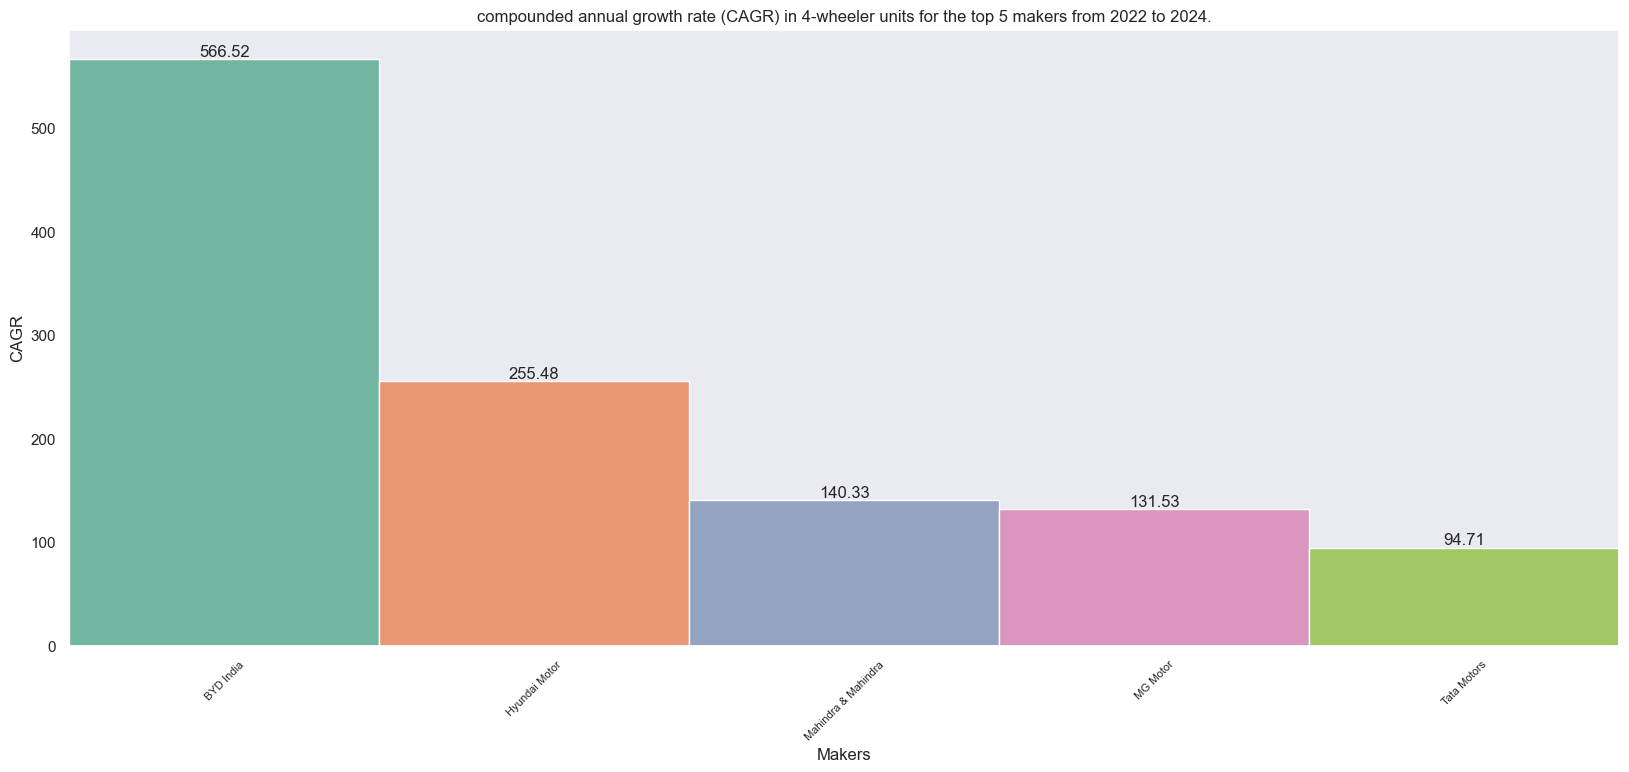

In [253]:

plt.figure(figsize=(20, 8))
ax = sns.barplot(data = cagr_final, x = 'maker', y ='CAGR',hue='maker',palette='Set2',width=1)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('compounded annual growth rate (CAGR) in 4-wheeler units for the top 5 makers from 2022 to 2024.')
plt.xticks(rotation= 45,size=8)
plt.ylabel('CAGR')
plt.xlabel('Makers')
plt.show()

Question No : 07 - List down the top 10 states that had the highest compounded annual growth rate (CAGR) from 2022 to 2024 in total vehicles sold.

In [254]:
df2.loc[:,'year'] = df2['fiscal_year'].str.extract(r'FY(\d{4})', expand=False).astype(int)

In [255]:
df2.columns

Index(['date', 'state', 'vehicle_category', 'electric_vehicles_sold',
       'total_vehicles_sold', 'fiscal_year', 'year'],
      dtype='object')

In [256]:
df2_states = df2.groupby(['state', 'year'])['total_vehicles_sold'].sum().reset_index()

In [257]:
df2_states

,state,year,total_vehicles_sold
0,Andaman & Nicobar,2024,660
1,Andaman & Nicobar Island,2022,5148
2,Andaman & Nicobar Island,2023,6534
3,Andaman & Nicobar Island,2024,6543
4,Andhra Pradesh,2022,772748
...,...,...,...
98,Uttarakhand,2023,216265
99,Uttarakhand,2024,233111
100,West Bengal,2022,860709
101,West Bengal,2023,913558


In [258]:
df2_states_cagr_results = df2_states.groupby(['state']).apply(lambda x: calculate_cagr_group(x,'total_vehicles_sold')).sort_values(by='CAGR', ascending=False).reset_index()
df2_states_cagr_results = df2_states_cagr_results.drop(columns=['level_1'])

df2_states_cagr_results['CAGR'] = (df2_states_cagr_results['CAGR']*100).round(2)
df2_states_cagr_results

C:\Users\samit\AppData\Local\Temp\ipykernel_31244\974018345.py:8: RuntimeWarning: divide by zero encountered in scalar divide
  cagr = (ending_value/beginning_value)** (1/years)-1
C:\Users\samit\AppData\Local\Temp\ipykernel_31244\52077840.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df2_states_cagr_results = df2_states.groupby(['state']).apply(lambda x: calculate_cagr_group(x,'total_vehicles_sold')).sort_values(by='CAGR', ascending=False).reset_index()


,state,CAGR,electric_vehicles_sold
0,Meghalaya,28.47,36628
1,Goa,27.41,78524
2,Karnataka,25.28,1581988
3,Delhi,22.88,606348
4,Rajasthan,21.50,1300476
5,Gujarat,20.55,1590987
6,Assam,20.13,547626
7,Mizoram,18.77,27422
8,Arunachal Pradesh,18.30,27892
9,Haryana,17.68,732029


In [259]:
df2_states_cagr_final= df2_states_cagr_results.head(10)

In [289]:
print("\n Top 10 states that had the highest CAGR from 2022 to 2024 in total vehicles sold")
df2_states_cagr_final


 Top 10 states that had the highest CAGR from 2022 to 2024 in total vehicles sold


,state,CAGR,electric_vehicles_sold
0,Meghalaya,28.47,36628
1,Goa,27.41,78524
2,Karnataka,25.28,1581988
3,Delhi,22.88,606348
4,Rajasthan,21.50,1300476
5,Gujarat,20.55,1590987
6,Assam,20.13,547626
7,Mizoram,18.77,27422
8,Arunachal Pradesh,18.30,27892
9,Haryana,17.68,732029


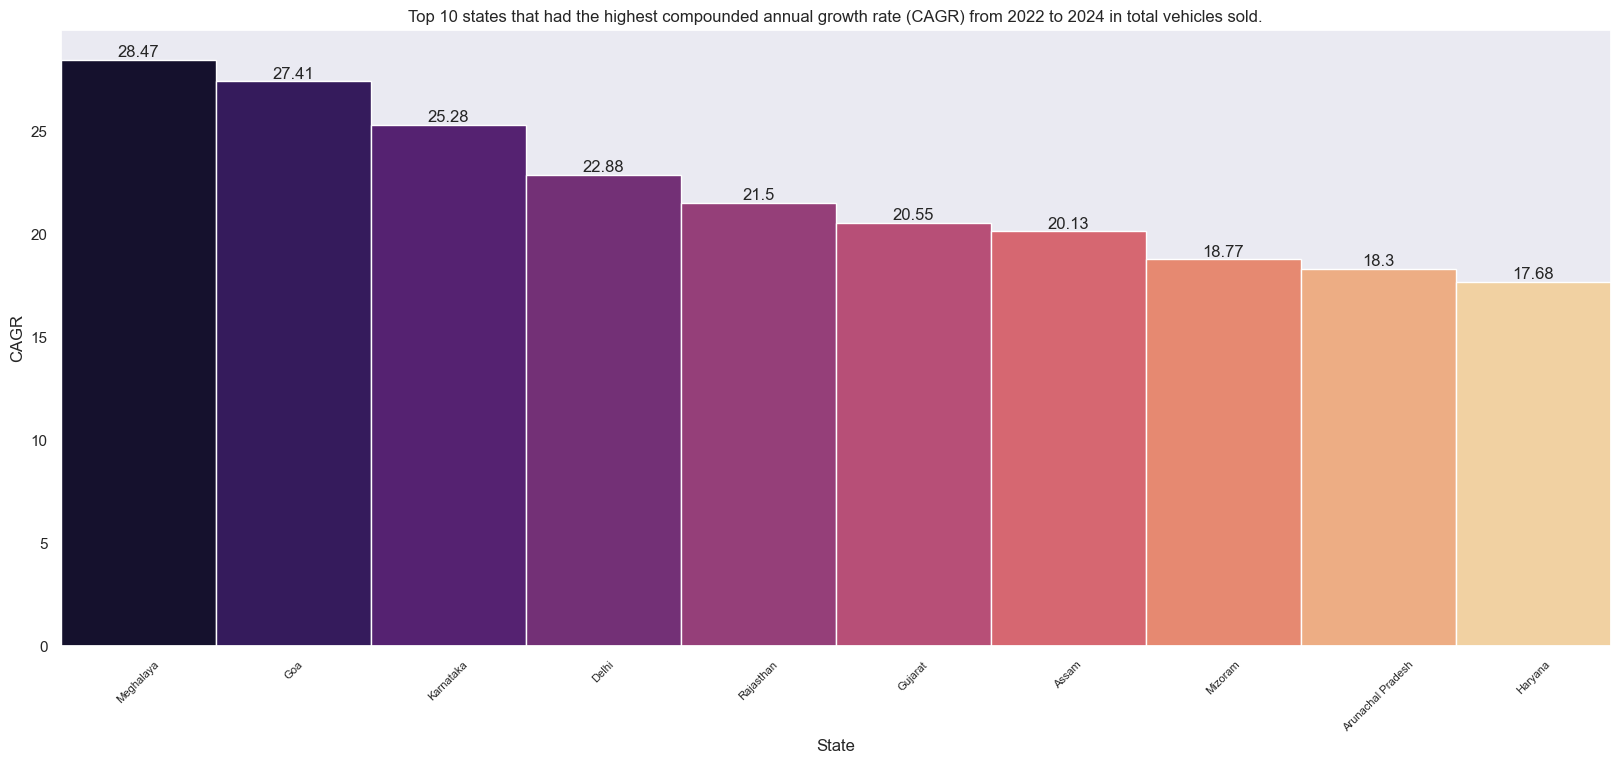

In [260]:

plt.figure(figsize=(20, 8))
ax = sns.barplot(data = df2_states_cagr_final, x = 'state', y ='CAGR',hue='state',palette='magma',width=1)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Top 10 states that had the highest compounded annual growth rate (CAGR) from 2022 to 2024 in total vehicles sold.')
plt.xticks(rotation= 45,size=8)
plt.ylabel('CAGR')
plt.xlabel('State')
plt.show()

Question No : 08 - What are the peak and low season months for EV sales based on the data from 2022 to 2024?


In [261]:
df['month'] = df['date'].dt.month

In [262]:
df

,date,vehicle_category,maker,electric_vehicles_sold,fiscal_year,month
0,2021-04-01,2-Wheelers,OLA ELECTRIC,0,FY2022,4
1,2022-04-01,2-Wheelers,OKAYA EV,0,FY2023,4
2,2021-05-01,2-Wheelers,OLA ELECTRIC,0,FY2022,5
3,2021-06-01,2-Wheelers,OLA ELECTRIC,0,FY2022,6
4,2021-07-01,2-Wheelers,OLA ELECTRIC,0,FY2022,7
...,...,...,...,...,...,...
811,2024-03-01,2-Wheelers,BGAUSS,3070,FY2024,3
812,2024-03-01,2-Wheelers,BATTRE ELECTRIC,625,FY2024,3
813,2024-03-01,2-Wheelers,KINETIC GREEN,3915,FY2024,3
814,2024-03-01,2-Wheelers,REVOLT,585,FY2024,3


In [263]:
df_monthly_sales = df.groupby(['month','fiscal_year'])['electric_vehicles_sold'].sum().reset_index()

In [264]:

df_monthly_sales['month']  = df_monthly_sales['month'].apply(lambda x: calendar.month_name[x])

In [265]:
df_monthly_sales

,month,fiscal_year,electric_vehicles_sold
0,January,FY2022,31672
1,January,FY2023,68116
2,January,FY2024,89311
3,February,FY2022,38171
4,February,FY2023,70827
5,February,FY2024,89051
6,March,FY2022,58118
7,March,FY2023,95126
8,March,FY2024,138343
9,April,FY2022,6315


In [266]:
df_monthly_sales_sorted = df_monthly_sales.sort_values(by='electric_vehicles_sold', ascending=False).reset_index()

In [290]:
peak_month = df_monthly_sales_sorted.head(1)
print("\n Peak Month for EV sales based on the data from 2022 to 2024")
peak_month


 Peak Month for EV sales based on the data from 2022 to 2024


,index,month,fiscal_year,electric_vehicles_sold
0,8,March,FY2024,138343


In [291]:
low_month = df_monthly_sales_sorted.tail(1)
print("\n Low Month for EV sales based on the data from 2022 to 2024")
low_month


 Low Month for EV sales based on the data from 2022 to 2024


,index,month,fiscal_year,electric_vehicles_sold
35,12,May,FY2022,1499


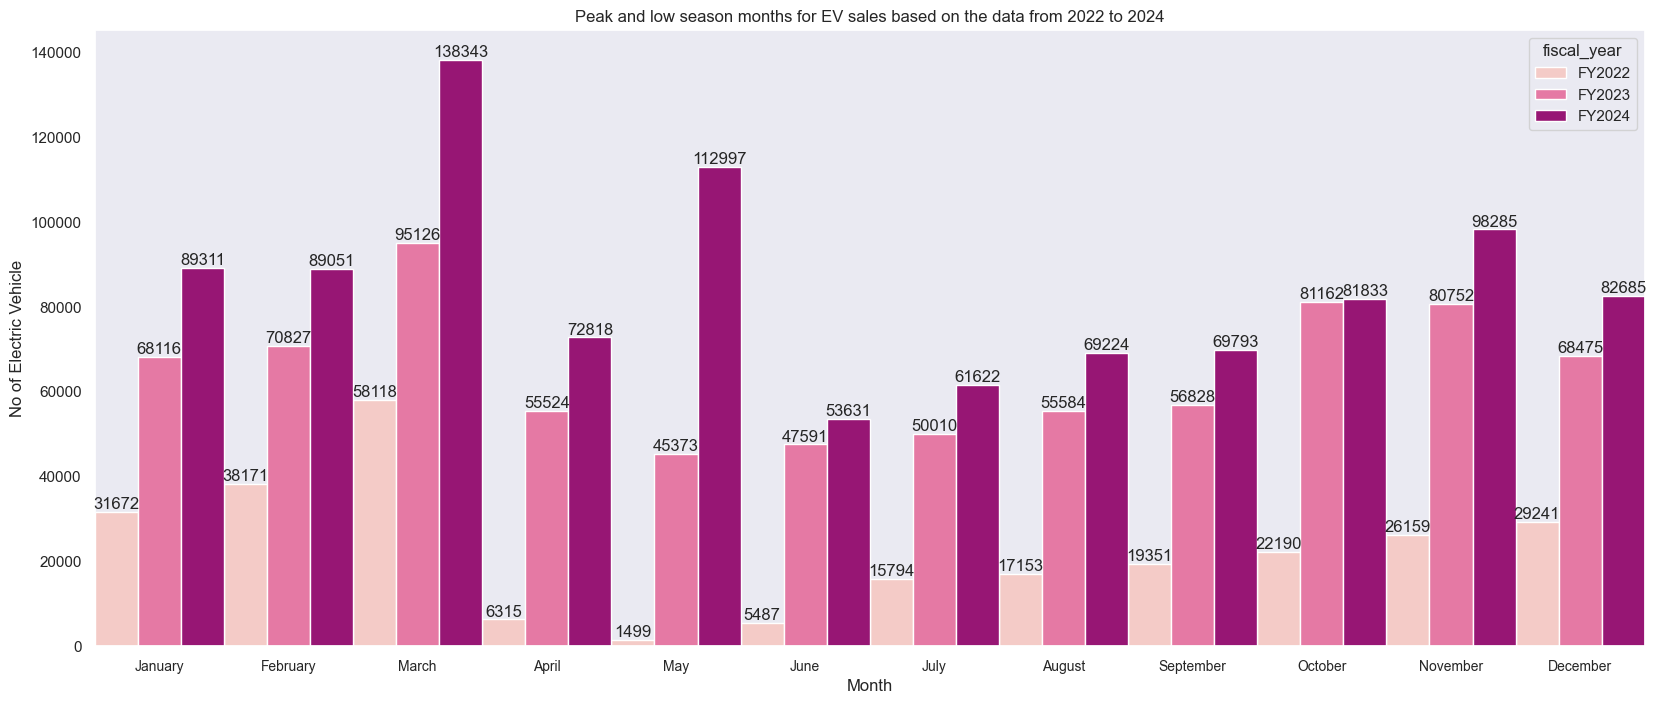

In [269]:

plt.figure(figsize=(20, 8))
ax = sns.barplot(data = df_monthly_sales, x = 'month', y ='electric_vehicles_sold',hue='fiscal_year',palette='RdPu',width=1)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Peak and low season months for EV sales based on the data from 2022 to 2024')
plt.xticks(size=10)
plt.ylabel('No of Electric Vehicle')
plt.xlabel('Month')
plt.show()

Question No : 09 - What is the projected number of EV sales (including 2-wheelers and 4-wheelers) for the top 10 states by penetration rate in 2030, based on the compounded annual growth rate (CAGR) from previous years?

In [270]:
penetration_rate_FY2024 =penetration_rate_FY2024.drop(columns=['fiscal_year'])
penetration_rate_FY2024

,state,%_penetration_rate
0,Andaman & Nicobar,0.30
1,Andaman & Nicobar Island,0.50
2,Andhra Pradesh,4.24
3,Arunachal Pradesh,0.11
4,Assam,0.64
5,Bihar,1.33
6,Chandigarh,6.37
7,Chhattisgarh,5.67
8,DNH and DD,1.21
9,Delhi,7.71


In [271]:
state_penetration_rate = penetration_rate_FY2024.sort_values(by='%_penetration_rate', ascending=False)

In [272]:
df2_filtered_state = df2.groupby(['state','year'])['electric_vehicles_sold'].sum().reset_index()

In [273]:
df2_filtered_state

,state,year,electric_vehicles_sold
0,Andaman & Nicobar,2024,2
1,Andaman & Nicobar Island,2022,22
2,Andaman & Nicobar Island,2023,23
3,Andaman & Nicobar Island,2024,33
4,Andhra Pradesh,2022,13928
...,...,...,...
98,Uttarakhand,2023,6712
99,Uttarakhand,2024,6336
100,West Bengal,2022,2685
101,West Bengal,2023,11011


In [274]:
cagr_state = df2_filtered_state.groupby(['state']).apply(lambda x: calculate_cagr_group(x, 'electric_vehicles_sold')).sort_values(by='CAGR', ascending=False).reset_index()
cagr_state['CAGR'] = (cagr_state['CAGR']*100).round(2)
cagr_state = cagr_state.drop(columns=['level_1'])

cagr_state


C:\Users\samit\AppData\Local\Temp\ipykernel_31244\974018345.py:8: RuntimeWarning: divide by zero encountered in scalar divide
  cagr = (ending_value/beginning_value)** (1/years)-1
C:\Users\samit\AppData\Local\Temp\ipykernel_31244\1266430908.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  cagr_state = df2_filtered_state.groupby(['state']).apply(lambda x: calculate_cagr_group(x, 'electric_vehicles_sold')).sort_values(by='CAGR', ascending=False).reset_index()


,state,CAGR,electric_vehicles_sold
0,Mizoram,1558.31,275
1,Meghalaya,476.63,133
2,Arunachal Pradesh,456.78,31
3,Tripura,229.50,304
4,Nagaland,200.00,9
5,Chandigarh,164.58,2877
6,Chhattisgarh,150.89,28540
7,West Bengal,150.62,16864
8,Goa,146.45,10799
9,DNH and DD,137.85,198


In [275]:
merged_cagr_state = pd.merge(state_penetration_rate,cagr_state, on='state')

In [276]:
merged_cagr_state_finals= merged_cagr_state.sort_values('%_penetration_rate',ascending=False)


In [277]:
cagr_state_finals = merged_cagr_state_finals.head(10)

In [278]:
def project_ev_sales(current_ev_sales, cagr, n):
    future_ev_sales = current_ev_sales * (1 + cagr / 100) ** n
    return future_ev_sales

In [293]:
n_years = 6
cagr_state_finals['projected_ev_sales'] = cagr_state_finals.apply(lambda row: project_ev_sales(row['electric_vehicles_sold'], row['CAGR'], n_years), axis=1)
cagr_state_finals['projected_ev_sales'] = cagr_state_finals['projected_ev_sales'].apply(lambda x: f"{x:.2f}")
cagr_state_finals['projected_ev_sales'] = cagr_state_finals['projected_ev_sales'].astype(float)
cagr_state_finals = cagr_state_finals.sort_values(by='projected_ev_sales', ascending=False).reset_index(drop=True)
print("\n Projected EV Sales for Top 10 States in 2030 ")
cagr_state_finals


 Projected EV Sales for Top 10 States in 2030 


,state,%_penetration_rate,CAGR,electric_vehicles_sold,projected_ev_sales
0,Maharashtra,8.60,101.89,197169,13351420.74
1,Kerala,11.59,132.83,73938,11778807.60
2,Karnataka,10.18,93.24,160989,8382592.91
3,Chhattisgarh,5.67,150.89,28540,7117935.98
4,Odisha,6.33,102.94,39118,2732640.99
5,Goa,13.75,146.45,10799,2419671.87
6,Tamil Nadu,5.49,59.95,94314,1579361.80
7,Delhi,7.71,68.10,46724,1054256.52
8,Chandigarh,6.37,164.58,2877,986919.96
9,Puducherry,5.37,105.44,3098,232911.78


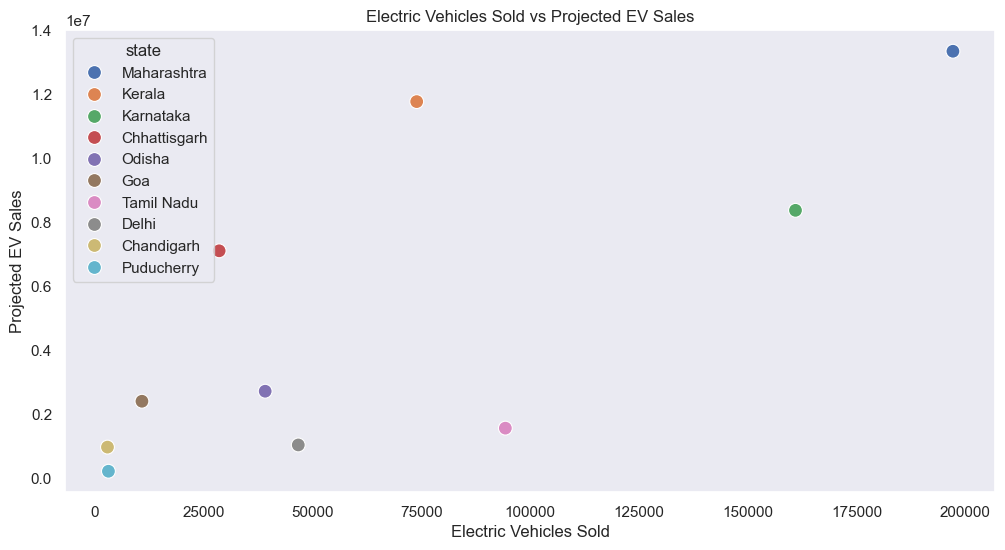

In [280]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='electric_vehicles_sold', y='projected_ev_sales', data=cagr_state_finals, hue='state', s=100)
plt.title('Electric Vehicles Sold vs Projected EV Sales')
plt.xlabel('Electric Vehicles Sold')
plt.ylabel('Projected EV Sales')
plt.show()

Question No : 10 - Estimate the revenue growth rate of 4-wheeler and 2-wheelers EVs in India for 2022 vs 2024 and 2023 vs 2024, assuming an average unit price. 

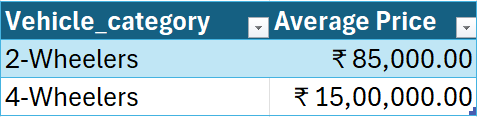

In [281]:
df_2_wheelers_FY = df_2_wheelers.groupby(['vehicle_category','fiscal_year'])['electric_vehicles_sold'].sum(). reset_index()
df_2_wheelers_FY

,vehicle_category,fiscal_year,electric_vehicles_sold
0,2-Wheelers,FY2022,252573
1,2-Wheelers,FY2023,727903
2,2-Wheelers,FY2024,932692


In [282]:
df_4_wheelers_FY = df_4_wheelers.groupby(['vehicle_category','fiscal_year'])['electric_vehicles_sold'].sum(). reset_index()
df_4_wheelers_FY

,vehicle_category,fiscal_year,electric_vehicles_sold
0,4-Wheelers,FY2022,18577
1,4-Wheelers,FY2023,47465
2,4-Wheelers,FY2024,86901


In [283]:
def calculate_specific_growth_rates(df_2_wheelers_FY, df_4_wheelers_FY, price_2w, price_4w):
    
    
    
    
    growth_rates = {}
    
    for start_year, end_year in periods:
        
       
        sales_2w_start = df_2_wheelers_FY[df_2_wheelers_FY['fiscal_year'] == start_year]
        sales_2w_end = df_2_wheelers_FY[df_2_wheelers_FY['fiscal_year'] == end_year]
        
        sales_4w_start = df_4_wheelers_FY[df_4_wheelers_FY['fiscal_year'] == start_year]
        sales_4w_end = df_4_wheelers_FY[df_4_wheelers_FY['fiscal_year'] == end_year]
        
        
        revenue_2w_start = sales_2w_start['electric_vehicles_sold'] * price_2w
        revenue_2w_end = sales_2w_end['electric_vehicles_sold'] * price_2w
        
        revenue_4w_start = sales_4w_start['electric_vehicles_sold'] * price_4w
        revenue_4w_end = sales_4w_end['electric_vehicles_sold'] * price_4w
        
    
        growth_rate_2w = round(((revenue_2w_end.sum() - revenue_2w_start.sum()) / revenue_2w_start.sum()) * 100, 2)
        growth_rate_4w = round(((revenue_4w_end.sum() - revenue_4w_start.sum()) / revenue_4w_start.sum()) * 100, 2)
        
        # Store growth rates
        growth_rates[(start_year, end_year)] = {
            'Growth rate 2-wheelers': growth_rate_2w,
            'Growth rate 4-wheelers': growth_rate_4w
        }
    

    
    return growth_rates
    

periods = [
        ('FY2022', 'FY2024'),
        ('FY2023', 'FY2024')
    ]
growth_rates = calculate_specific_growth_rates(df_2_wheelers_FY, df_4_wheelers_FY, 85000, 1500000)
periods_str = [f'{start_year} to {end_year}' for start_year, end_year in periods]
growth_rate_2w = [growth_rates[('FY2022', 'FY2024')]['Growth rate 2-wheelers'], 
                  growth_rates[('FY2023', 'FY2024')]['Growth rate 2-wheelers']]
growth_rate_4w = [growth_rates[('FY2022', 'FY2024')]['Growth rate 4-wheelers'], 
                  growth_rates[('FY2023', 'FY2024')]['Growth rate 4-wheelers']]

print("Growth rate of revenue from 2-wheelers (FY2022 to FY2024):", growth_rate_2w[0], "%")
print("Growth rate of revenue from 2-wheelers (FY2023 to FY2024):", growth_rate_2w[1], "%")

print("Growth rate of revenue from 4-wheelers (FY2022 to FY2024):", growth_rate_4w[0], "%")
print("Growth rate of revenue from 4-wheelers (FY2023 to FY2024):", growth_rate_4w[1], "%")



Growth rate of revenue from 2-wheelers (FY2022 to FY2024): 269.28 %
Growth rate of revenue from 2-wheelers (FY2023 to FY2024): 28.13 %
Growth rate of revenue from 4-wheelers (FY2022 to FY2024): 367.79 %
Growth rate of revenue from 4-wheelers (FY2023 to FY2024): 83.08 %


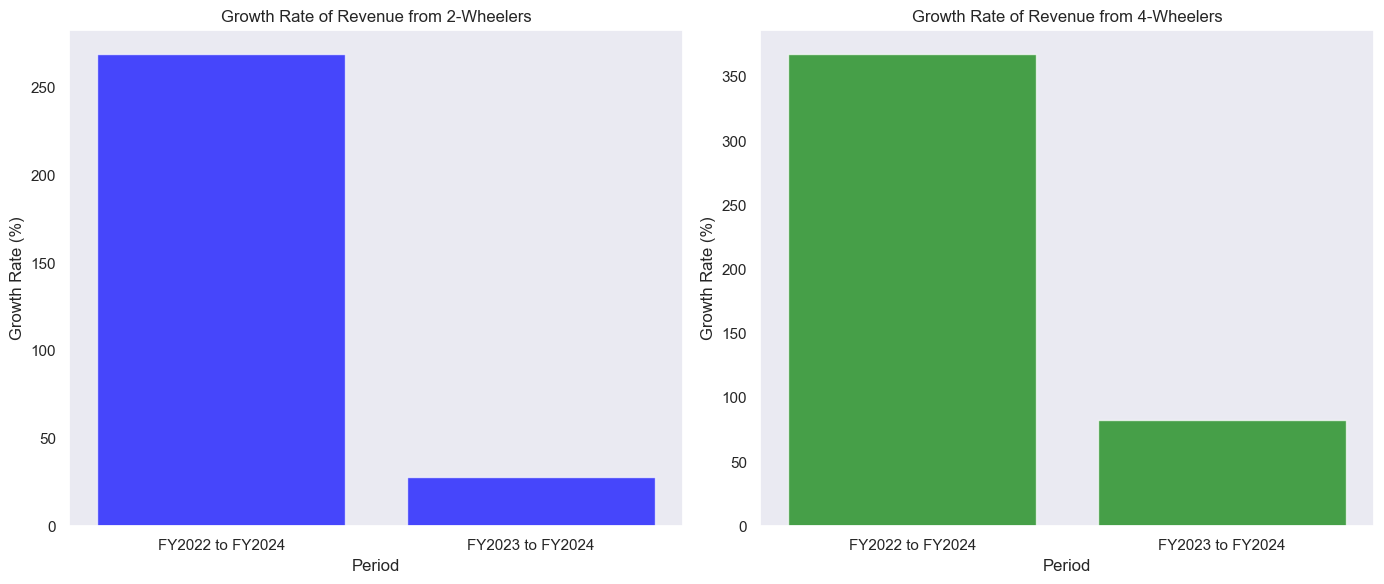

In [284]:

fig, ax = plt.subplots(1, 2, figsize=(14, 6))


ax1= ax[0].bar(periods_str, growth_rate_2w, color='blue', alpha=0.7)
ax[0].set_title('Growth Rate of Revenue from 2-Wheelers')
ax[0].set_ylabel('Growth Rate (%)')
ax[0].set_xlabel('Period')


ax2 = ax[1].bar(periods_str, growth_rate_4w, color='green', alpha=0.7)
ax[1].set_title('Growth Rate of Revenue from 4-Wheelers')
ax[1].set_ylabel('Growth Rate (%)')
ax[1].set_xlabel('Period')

plt.tight_layout()
plt.show()